In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import glob
from keras.preprocessing import image
from scipy import spatial

**8.1.1 Prepare main image feature**

In [8]:
# Load main image
main_image = cv2.imread('./pic.jpg')
main_image = cv2.cvtColor(main_image, cv2.COLOR_BGR2RGB)
h, w, c = main_image.shape
print(main_image.shape)

# Define tile size
tile_width, tile_hight = 30, 30
tile_size = (tile_width, tile_hight)  # (Width,Height)

# Create main image feature grid of subimage
# Calculate average (mean) color of each subimage with tile_size

main_image_feature = cv2.resize(
    main_image, dsize=(w//tile_width, h//tile_hight))
print(main_image_feature.shape)
for i in range(0, main_image_feature.shape[0]):
    for j in range(0, main_image_feature.shape[1]):
        main_image_feature[i, j] = main_image[i*tile_hight: (
            i+1)*tile_hight, j*tile_width: (j+1)*tile_width].mean(axis=(0, 1))


(538, 1024, 3)
(17, 34, 3)


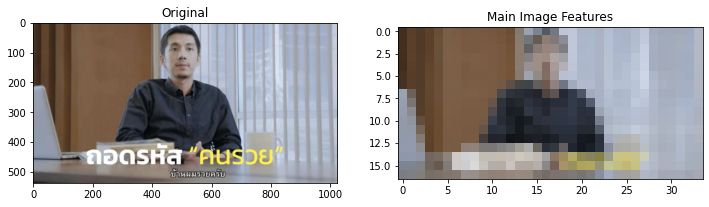

In [3]:
fig = plt.figure(figsize=(12,12))
ax = plt.subplot(1,2,1)
ax = plt.imshow(main_image)
ax = plt.title("Original")


ax = plt.subplot(1,2,2)
ax = plt.imshow(main_image_feature)
ax = plt.title("Main Image Features")

**8.1.2 Prepare tile images and features**

In [24]:
filenames = glob.glob('Background/*.jpg', recursive=True)

# Load image files and Resize (h,w,ch) -> h = w < 30 , ch = 3 (R,G,B)
# Convert the image to an array
# Normalized color image
tiles = []
for i in filenames:
    img = image.load_img(i, target_size=tile_size, interpolation="nearest")
    img = image.img_to_array(img)
    # img = img / 255
    tiles.append(img)

# Convert to numpy array
tiles = np.array(tiles)

# Create array of average(mean) color of each tile image

tile_features = []
for tile in tiles:
    mean_color = np.array(tile).mean(axis=(0,1))
    tile_features.append(mean_color)
tile_features[0]

array([123.157776, 112.78333 , 119.68667 ], dtype=float32)

**8.2 Image clustering and Matching using KNN with KDTree Algorithm**

In [47]:
# Create KDTree of tile color features
tree = spatial.KDTree(tile_features)

closest_tiles = np.zeros(shape=(main_image_feature.shape[0],main_image_feature.shape[1]))
#KNN (k=1) search for best mathched tiles with each subimage
for i in range(main_image_feature.shape[0]):
    for j in range(main_image_feature.shape[1]):
        closest = tree.query(main_image_feature[i,j])
        closest_tiles[i,j] = closest[1]
        print(closest)

closest_tiles = closest_tiles.astype("uint8")

(25.21531752872056, 71)
(10.599915747711256, 10)
(10.423389442822385, 10)
(12.002888906152567, 10)
(17.272472098029297, 36)
(15.095591992480719, 91)
(11.775833211419673, 91)
(8.431504996719033, 91)
(10.494931668128306, 91)
(9.360391744696917, 91)
(7.390027643071579, 91)
(9.00859283648046, 91)
(17.366356923766233, 91)
(12.792972410384412, 81)
(16.120886096341696, 66)
(15.563515911150093, 55)
(8.375151268588404, 27)
(4.791665852102854, 42)
(7.298844241889944, 6)
(6.752101620296269, 6)
(14.978691478219371, 21)
(16.438000108577793, 21)
(15.692712410980585, 21)
(13.904670769591396, 6)
(17.605525301836007, 21)
(16.542842614226146, 21)
(15.454486350275555, 21)
(7.469031592611755, 6)
(23.848823317980834, 8)
(23.564574923582924, 75)
(23.380862701054458, 75)
(23.05716966305744, 8)
(27.249284226932463, 21)
(5.101098123129075, 21)
(24.431969396830247, 71)
(10.356768961479622, 10)
(11.994180796420796, 10)
(12.546465398578885, 10)
(14.392565461799991, 91)
(16.162205726364785, 91)
(14.61928732983106,

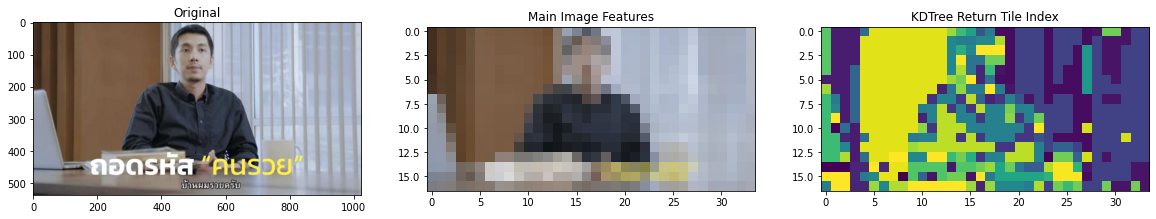

In [31]:
fig = plt.figure(figsize=(20,20))
ax = plt.subplot(1,3,1)
ax = plt.imshow(main_image)
ax = plt.title("Original")


ax = plt.subplot(1,3,2)
ax = plt.imshow(main_image_feature)
ax = plt.title("Main Image Features")

ax = plt.subplot(1,3,3)
ax = plt.imshow(closest_tiles)
ax = plt.title("KDTree Return Tile Index")

**8.3 Create image mosaic**

In [65]:
mosaic_image = np.array(main_image)
print(mosaic_image.shape)
# Fill each subimage with matched tile

# Offset of tile
for i in range(tile_size[0]):
    for j in range(tile_size[1]):
        x,y = i*tile_size[0], j*tile_size[1]

        # Index of tile
        index = closest_tiles[i,j]
        print(index)
        mosaic_image[x:(x+tile_size[0]),y:(y+tile_size[1]),:] = tile[index]

(510, 1020, 3)
71


IndexError: index 71 is out of bounds for axis 0 with size 30

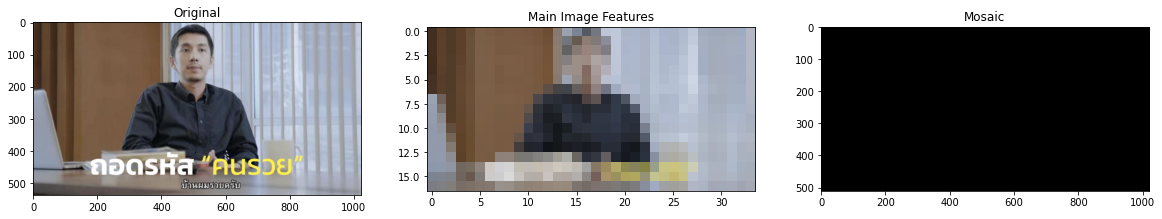

In [63]:
fig = plt.figure(figsize=(20,20))
ax = plt.subplot(1,3,1)
ax = plt.imshow(main_image)
ax = plt.title("Original")


ax = plt.subplot(1,3,2)
ax = plt.imshow(main_image_feature)
ax = plt.title("Main Image Features")

ax = plt.subplot(1,3,3)
ax = plt.imshow(mosaic_image)
ax = plt.title("Mosaic")